In [1]:
#import modules and functions
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as snsb
#from scipy.stats import skew, kurtosis
from sklearn.preprocessing import MinMaxScaler
import csv
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from matplotlib.patches import Patch
from matplotlib.patches import Circle

In [24]:

def scatter_hist(x, y, ax, ax_histx, ax_histy, color):
    ax.tick_params(axis='x', which='major', labelsize=20)  # Change 20 to your desired font size for x-axis ticks
    ax.tick_params(axis='y', which='major', labelsize=20)  # Change 20 to your desired font size for y-axis ticks
   # no labels
    ax_histx.tick_params(axis="x", labelbottom=False)
    ax_histy.tick_params(axis="y", labelleft=False)

    # the scatter plot:
    ax.scatter(x, y, c=color, alpha=0.5)
    
    # now determine nice limits by hand:
    binwidth = 0.25

    bins_x = np.linspace(min(x), max(x), 200)
    bins_y = np.linspace(min(y), max(y),200)

    ax_histx.tick_params(axis='x', which='major', labelbottom=False)
    ax_histx.tick_params(axis='y', which='major',labelsize=20)
    
    ax_histy.tick_params(axis='y', which='major', labelleft=False)
    ax_histy.tick_params(axis='x', which='major', labelsize=20,rotation =270)
    
    ax_histx.hist(x, bins=bins_x, color=color, alpha=0.7, edgecolor='none')
    ax_histy.hist(y, bins=bins_y, orientation='horizontal', color=color, alpha=0.7, edgecolor='none')


In [2]:
wholedata = pd.read_csv('./core_database/destress_wholedata_labelled_as_rd.csv')
wholedata.columns=wholedata.columns.to_list()

features = [
 'ss_prop_hbonded_turn',
 'ss_prop_bend',
 'ss_prop_loop',
 'hydrophobic_fitness',
 'isoelectric_point',
 'rosetta_fa_rep',
 'rosetta_fa_intra_rep',
 'rosetta_lk_ball_wtd',
 'rosetta_fa_intra_sol_xover4',
 'rosetta_hbond_lr_bb',
 'rosetta_hbond_sr_bb',
 'rosetta_hbond_sc',
 'rosetta_pro_close',
 'aggrescan3d_avg_value',
 'aggrescan3d_max_value']

/var/folders/jq/ph87kw_d695bbwx2yc22bgxh0000gn/T/ipykernel_25194/3494826433.py:1: DtypeWarning: Columns (48) have mixed types. Specify dtype option on import or set low_memory=False.
  wholedata = pd.read_csv('./core_database/destress_wholedata_labelled_as_rd.csv')


In [4]:
#Round 1 PCA
# Separating out the 
x_1 = wholedata.loc[:, features].values

# Separating out the target
y_1 = wholedata.loc[:,['Entry', 'label_1', 'label_2','composition_hydrophobic', 'composition_polar', 'composition_acidic','composition_basic', 'composition_cysteine', 'composition_glycine','composition_proline']].values

# Standardizing the features
x_1 = MinMaxScaler().fit_transform(x_1)
pca_2d_1 = PCA(n_components=2)

principalComponents_1 = pca_2d_1.fit_transform(x_1)

principalDf_2d_1 = pd.DataFrame(data = principalComponents_1
             , columns = ['principal component 1', 'principal component 2'])


Label by hydrophobic residue

In [13]:
# Define the bins and labels
bins = [float('-inf'), 0.36, 0.43, float('inf')]
labels = ['Hydrophobic residue <36%','Hydrophobic residue = 36-43%','Hydrophobic residue >43%']
wholedata_1  = wholedata.copy()
# Categorize the data
wholedata_1['category'] = pd.cut(wholedata['composition_hydrophobic'], bins=bins, labels=labels)

#concatenate the data and label into one dataframe
z_1 =wholedata_1.loc[:,['category']]
z_1.reset_index(drop=True, inplace=True)
finalDf_2d_1 = pd.concat([principalDf_2d_1, z_1], axis = 1)
#finalDf_2d_1 =finalDf_2d_1.sample(n = 100000, random_state=0)

/var/folders/jq/ph87kw_d695bbwx2yc22bgxh0000gn/T/ipykernel_13261/1897721134.py:55: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig('./figures/dimension_reduction/PCA_hydrophobic.png',dpi=300)


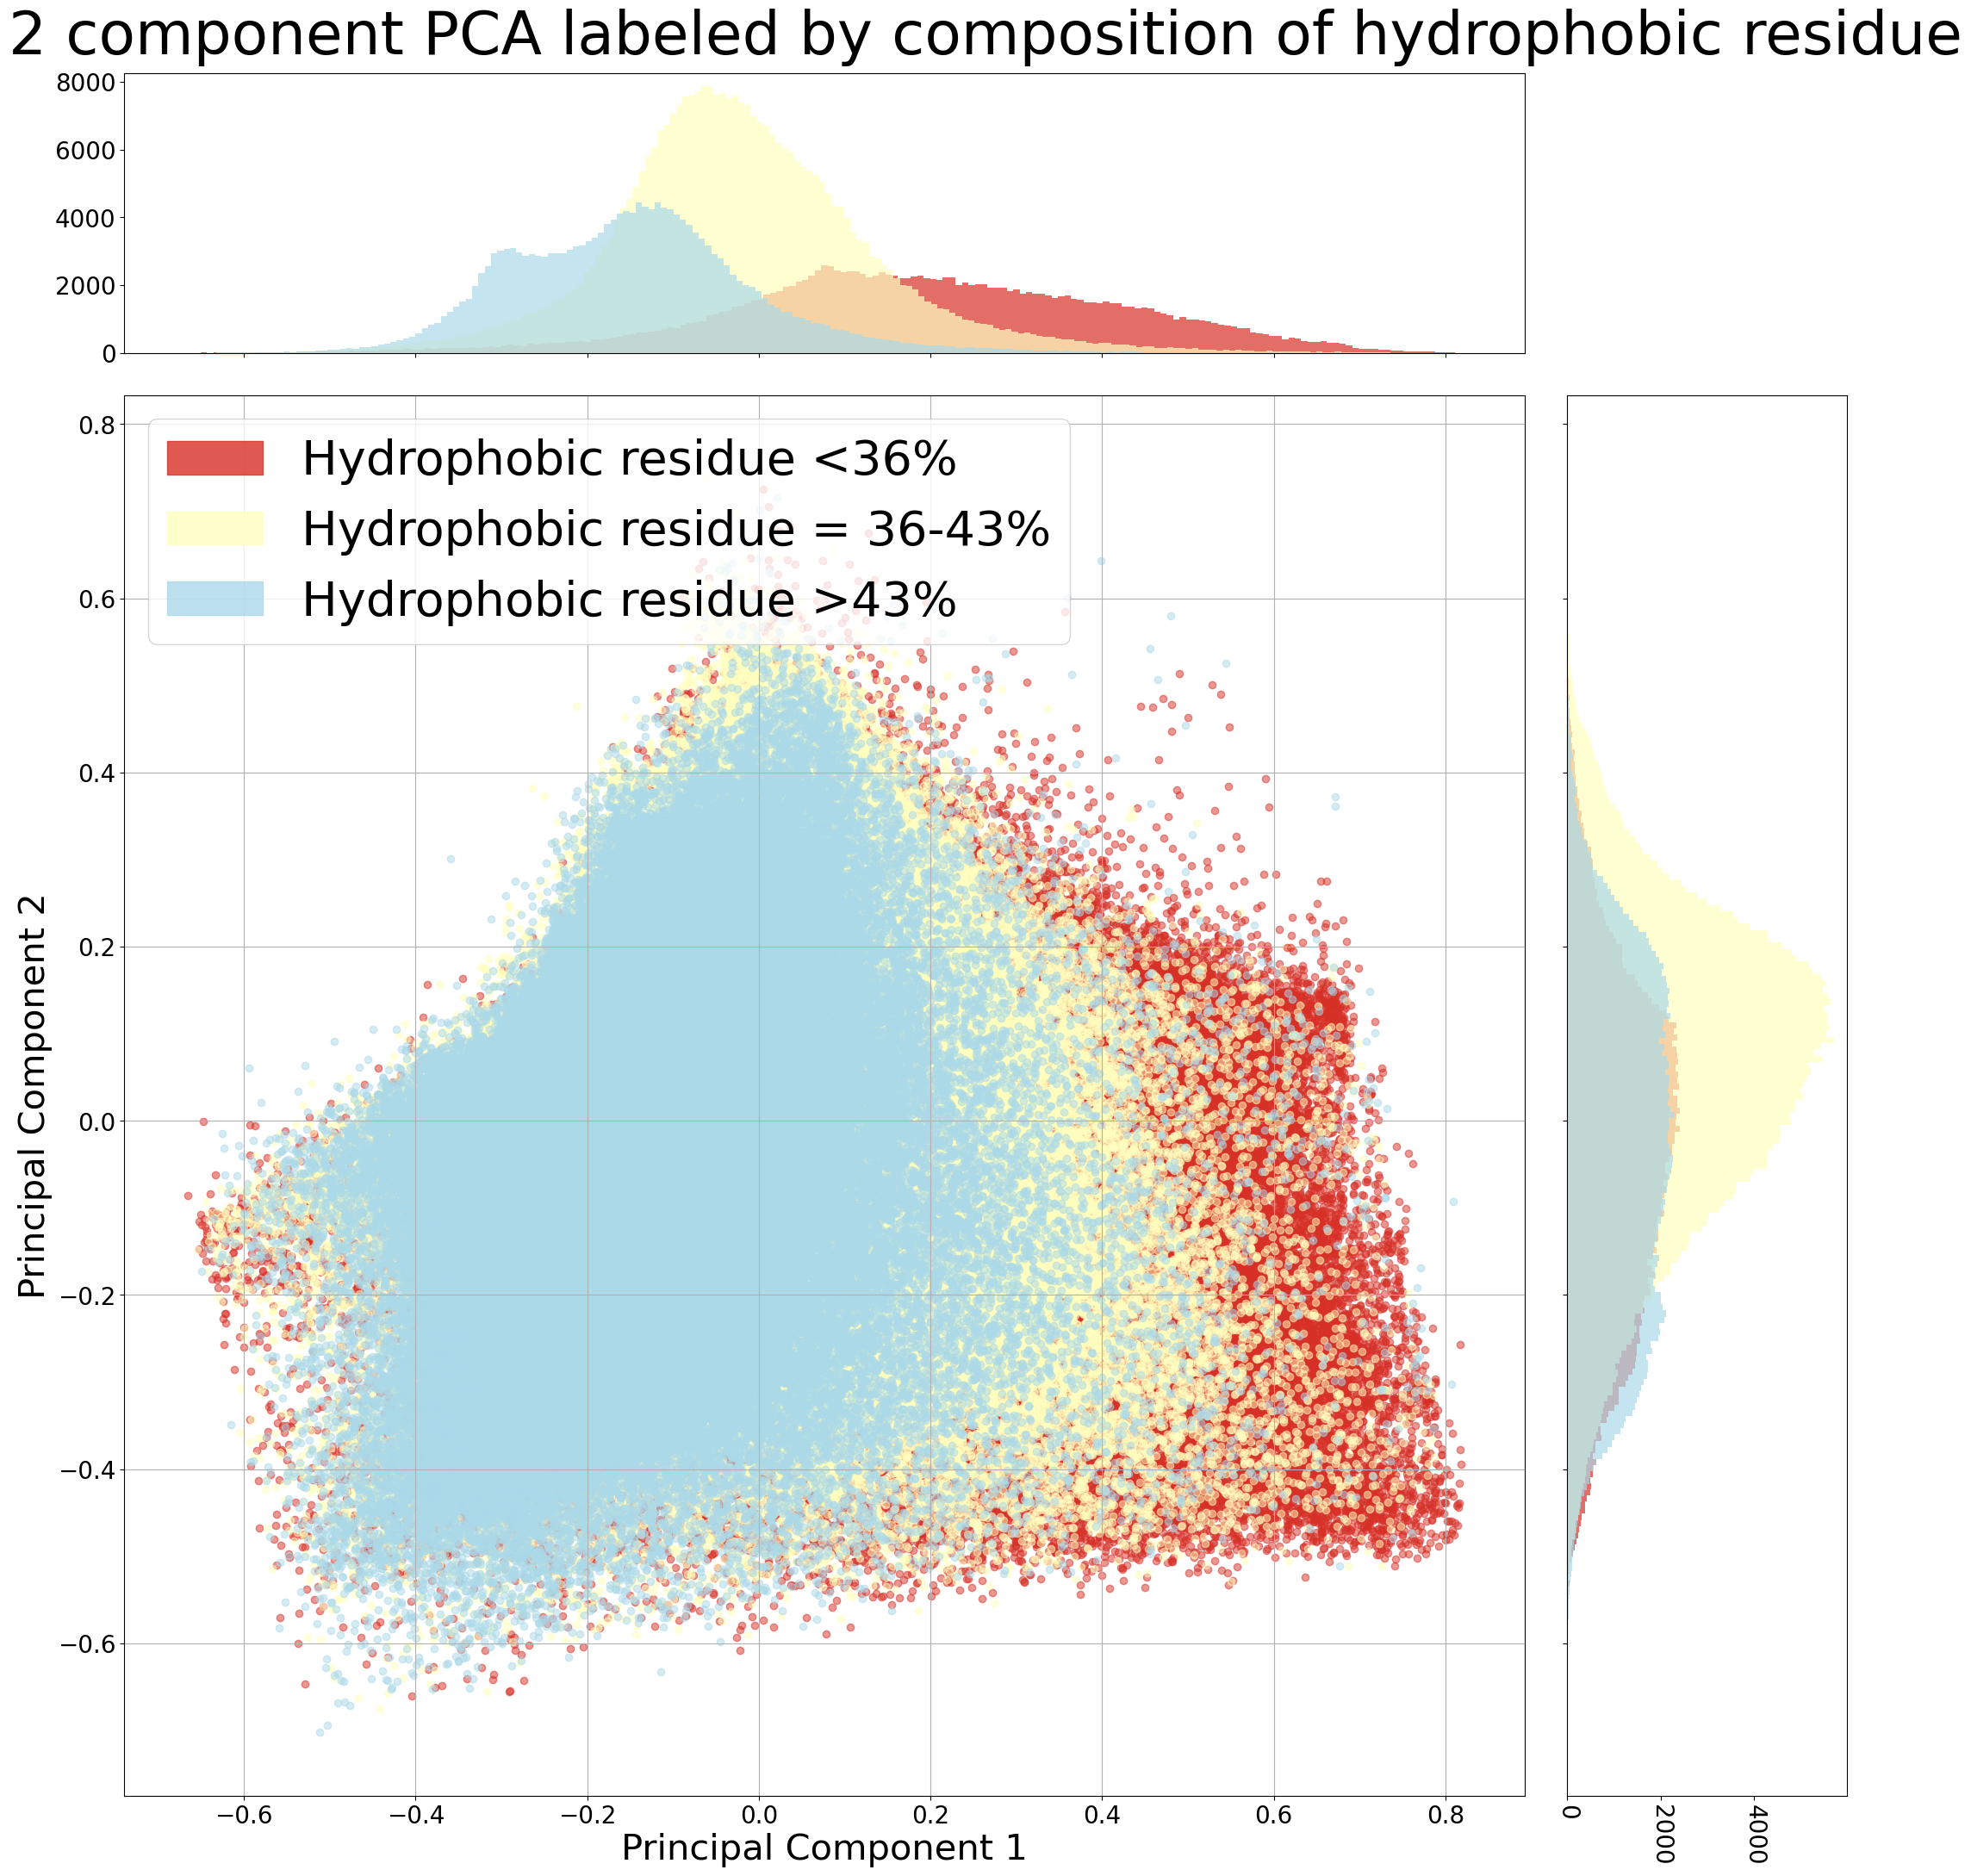

In [25]:
# Use the PCA data 
data_lt36 = finalDf_2d_1[finalDf_2d_1['category'] == 'Hydrophobic residue <36%']
data_36_43 = finalDf_2d_1[finalDf_2d_1['category'] == 'Hydrophobic residue = 36-43%']
data_gt43 = finalDf_2d_1[finalDf_2d_1['category'] == 'Hydrophobic residue >43%']

x_lt36 = data_lt36['principal component 1'].values
y_lt36 = data_lt36['principal component 2'].values
x_36_43 = data_36_43['principal component 1'].values
y_36_43 = data_36_43['principal component 2'].values
x_gt43 = data_gt43['principal component 1'].values
y_gt43 = data_gt43['principal component 2'].values


# Start with a square Figure.
fig = plt.figure(figsize=(25, 25))

# Add a gridspec with two rows and two columns and a ratio of 1 to 4 between
# the size of the marginal axes and the main axes in both directions.
# Also adjust the subplot parameters for a square plot.
gs = fig.add_gridspec(2, 2,  width_ratios=(5, 1), height_ratios=(1, 5),
                      left=0.1, right=0.9, bottom=0.1, top=0.9,
                      wspace=0.05, hspace=0.05)

# Create the Axes.
ax = fig.add_subplot(gs[1, 0])
ax_histx = fig.add_subplot(gs[0, 0], sharex=ax)
ax_histy = fig.add_subplot(gs[1, 1], sharey=ax)

xticks = np.arange(-1, 1.2, 0.2)
yticks = np.arange(-1, 1.2, 0.2)
ax.set_xticks(xticks)
ax.set_yticks(yticks)

# Set tick label size for the scatter plot
ax.tick_params(axis='both', which='major', labelsize=20)
# Draw the scatter plot and marginals.
scatter_hist(x_lt36, y_lt36, ax, ax_histx, ax_histy, color='#D73027')
scatter_hist(x_36_43, y_36_43, ax, ax_histx, ax_histy, color='#FFFFBF')
scatter_hist(x_gt43, y_gt43, ax, ax_histx, ax_histy, color='#ABD9E9')

# Set axis labels

ax.set_xlabel('Principal Component 1', fontsize = 30)
ax.set_ylabel('Principal Component 2', fontsize = 30)
fig.suptitle('2 component PCA labeled by composition of hydrophobic residue', fontsize = 50, y=0.93)
targets =['Hydrophobic residue <36%','Hydrophobic residue = 36-43%','Hydrophobic residue >43%']

colors = ['#D73027', '#FFFFBF', '#ABD9E9']

# Create legend
legend_handles = [Patch(facecolor=color, edgecolor=color, label=str(target),
                        linewidth=1, alpha=0.8) for target, color in zip(targets, colors)]
ax.grid()
ax.legend(handles=legend_handles, prop={'size': 40})
plt.savefig('./figures/dimension_reduction/PCA_hydrophobic.png',dpi=300)
# Display the plot
plt.show()


Label by CATH number

In [26]:
wholedata_2 = wholedata.copy()
wholedata_2['label_4'] = wholedata_2['label_3'].str[:1]

principalDf_2d_1 = pd.DataFrame(data = principalComponents_1
             , columns = ['principal component 1', 'principal component 2'])

#concatenate the data and label into one dataframe
z =wholedata_2.loc[:,['label_4']]
z.reset_index(drop=True, inplace=True)

finalDf = pd.concat([principalDf_2d_1, z], axis = 1)
finalDf.dropna(inplace=True)
finalDf.reset_index(drop=True, inplace=True)


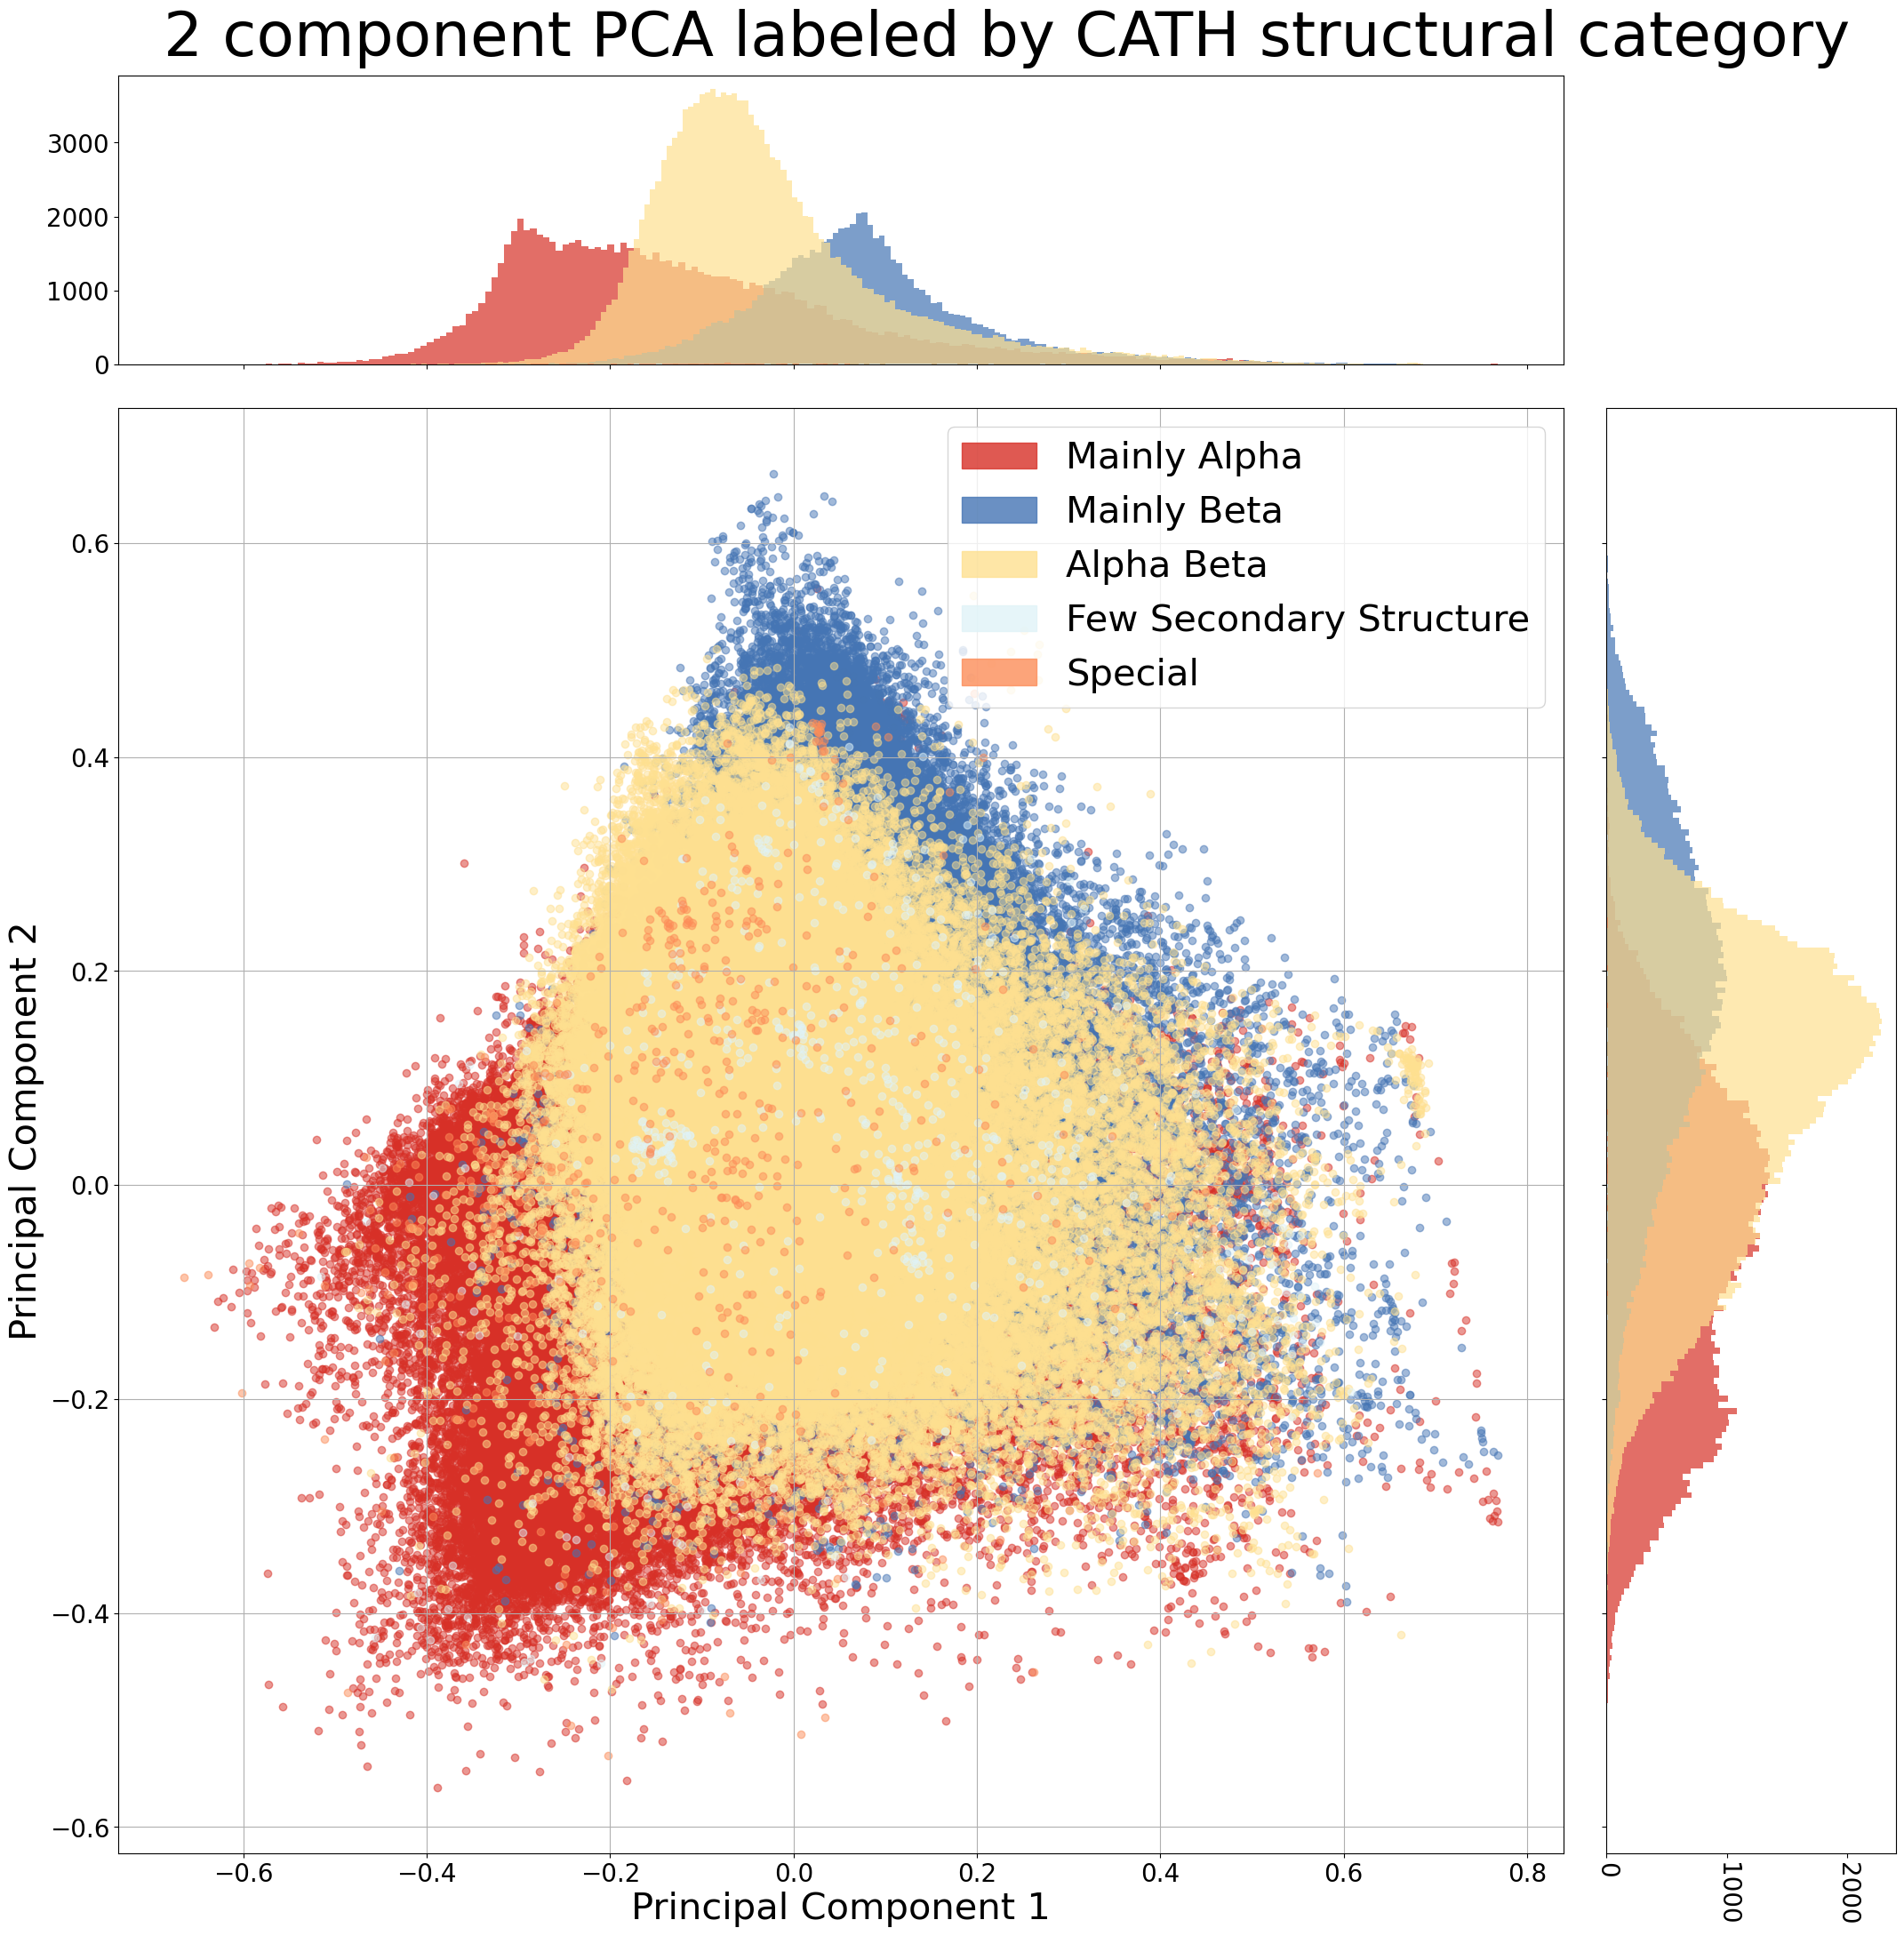

In [27]:
# Assuming you have the finalDf DataFrame with the 'label_4' column
fig = plt.figure(figsize=(25, 25))

# Add a gridspec with two rows and two columns and a ratio of 1 to 4 between
# the size of the marginal axes and the main axes in both directions.
# Also adjust the subplot parameters for a square plot.
gs = fig.add_gridspec(2, 2,  width_ratios=(5, 1), height_ratios=(1, 5),
                      left=0.1, right=0.9, bottom=0.1, top=0.9,
                      wspace=0.05, hspace=0.05)

# Create the Axes.
ax = fig.add_subplot(gs[1, 0])
xticks = np.arange(-1, 1.2, 0.2)
yticks = np.arange(-1, 1.2, 0.2)
ax.set_xticks(xticks)
ax.set_yticks(yticks)

# Set tick label size for the scatter plot
ax.tick_params(axis='both', which='major', labelsize=20)

ax_histx = fig.add_subplot(gs[0, 0], sharex=ax)
ax_histy = fig.add_subplot(gs[1, 1], sharey=ax)


ax.set_xlabel('Principal Component 1', fontsize = 30)
ax.set_ylabel('Principal Component 2', fontsize = 30)
fig.suptitle('2 component PCA labeled by CATH structural category', fontsize = 50, y=0.93)

targets = ['1','2','3','4','6']
colors = ['#d73027', '#4575b4',  '#fee090', '#e0f3f8', '#fc8d59']

data_by_target = {target: finalDf[finalDf['label_4'] == target] for target in targets}

for target, color in zip(targets, colors):
    x_data = data_by_target[target]['principal component 1'].values
    y_data = data_by_target[target]['principal component 2'].values
    scatter_hist(x_data, y_data, ax, ax_histx, ax_histy, color=color)

ax.grid()
# Create custom legend handles
# Custom labels for the legend
custom_labels = ['Mainly Alpha', 'Mainly Beta', 'Alpha Beta', 'Few Secondary Structure', 'Special']

# Create custom legend handles
legend_handles = [Patch(facecolor=color, edgecolor=color, label=label, linewidth=1, alpha=0.8) for label, color in zip(custom_labels, colors)]

ax.legend(handles=legend_handles, prop={'size': 30})
plt.savefig('./figures/dimension_reduction/PCA_CATH_labeling.png',dpi=300)
# Add the custom legend to the plot

plt.show()



t-SNE plotting

In [3]:
wholedata_label = pd.read_csv('./core_database/destress_wholedata_labelled_as_rd.csv')
reduced_data_df_num = pd.read_csv('./reduced_data/tSNE_reduced_data_wt_ss.csv')
wholedata_label['label_4'] = wholedata_label['label_3'].str[:1]
# Assuming the label column in 'wholedata_label' is named 'label_4'
z = wholedata_label.loc[:, ['label_4']]
z.reset_index(drop=True, inplace=True)

finalDf = pd.concat([reduced_data_df_num, z], axis=1)
finalDf.dropna(inplace=True)
finalDf.reset_index(drop=True, inplace=True)

/var/folders/jq/ph87kw_d695bbwx2yc22bgxh0000gn/T/ipykernel_25194/246743408.py:1: DtypeWarning: Columns (48) have mixed types. Specify dtype option on import or set low_memory=False.
  wholedata_label = pd.read_csv('./core_database/destress_wholedata_labelled_as_rd.csv')


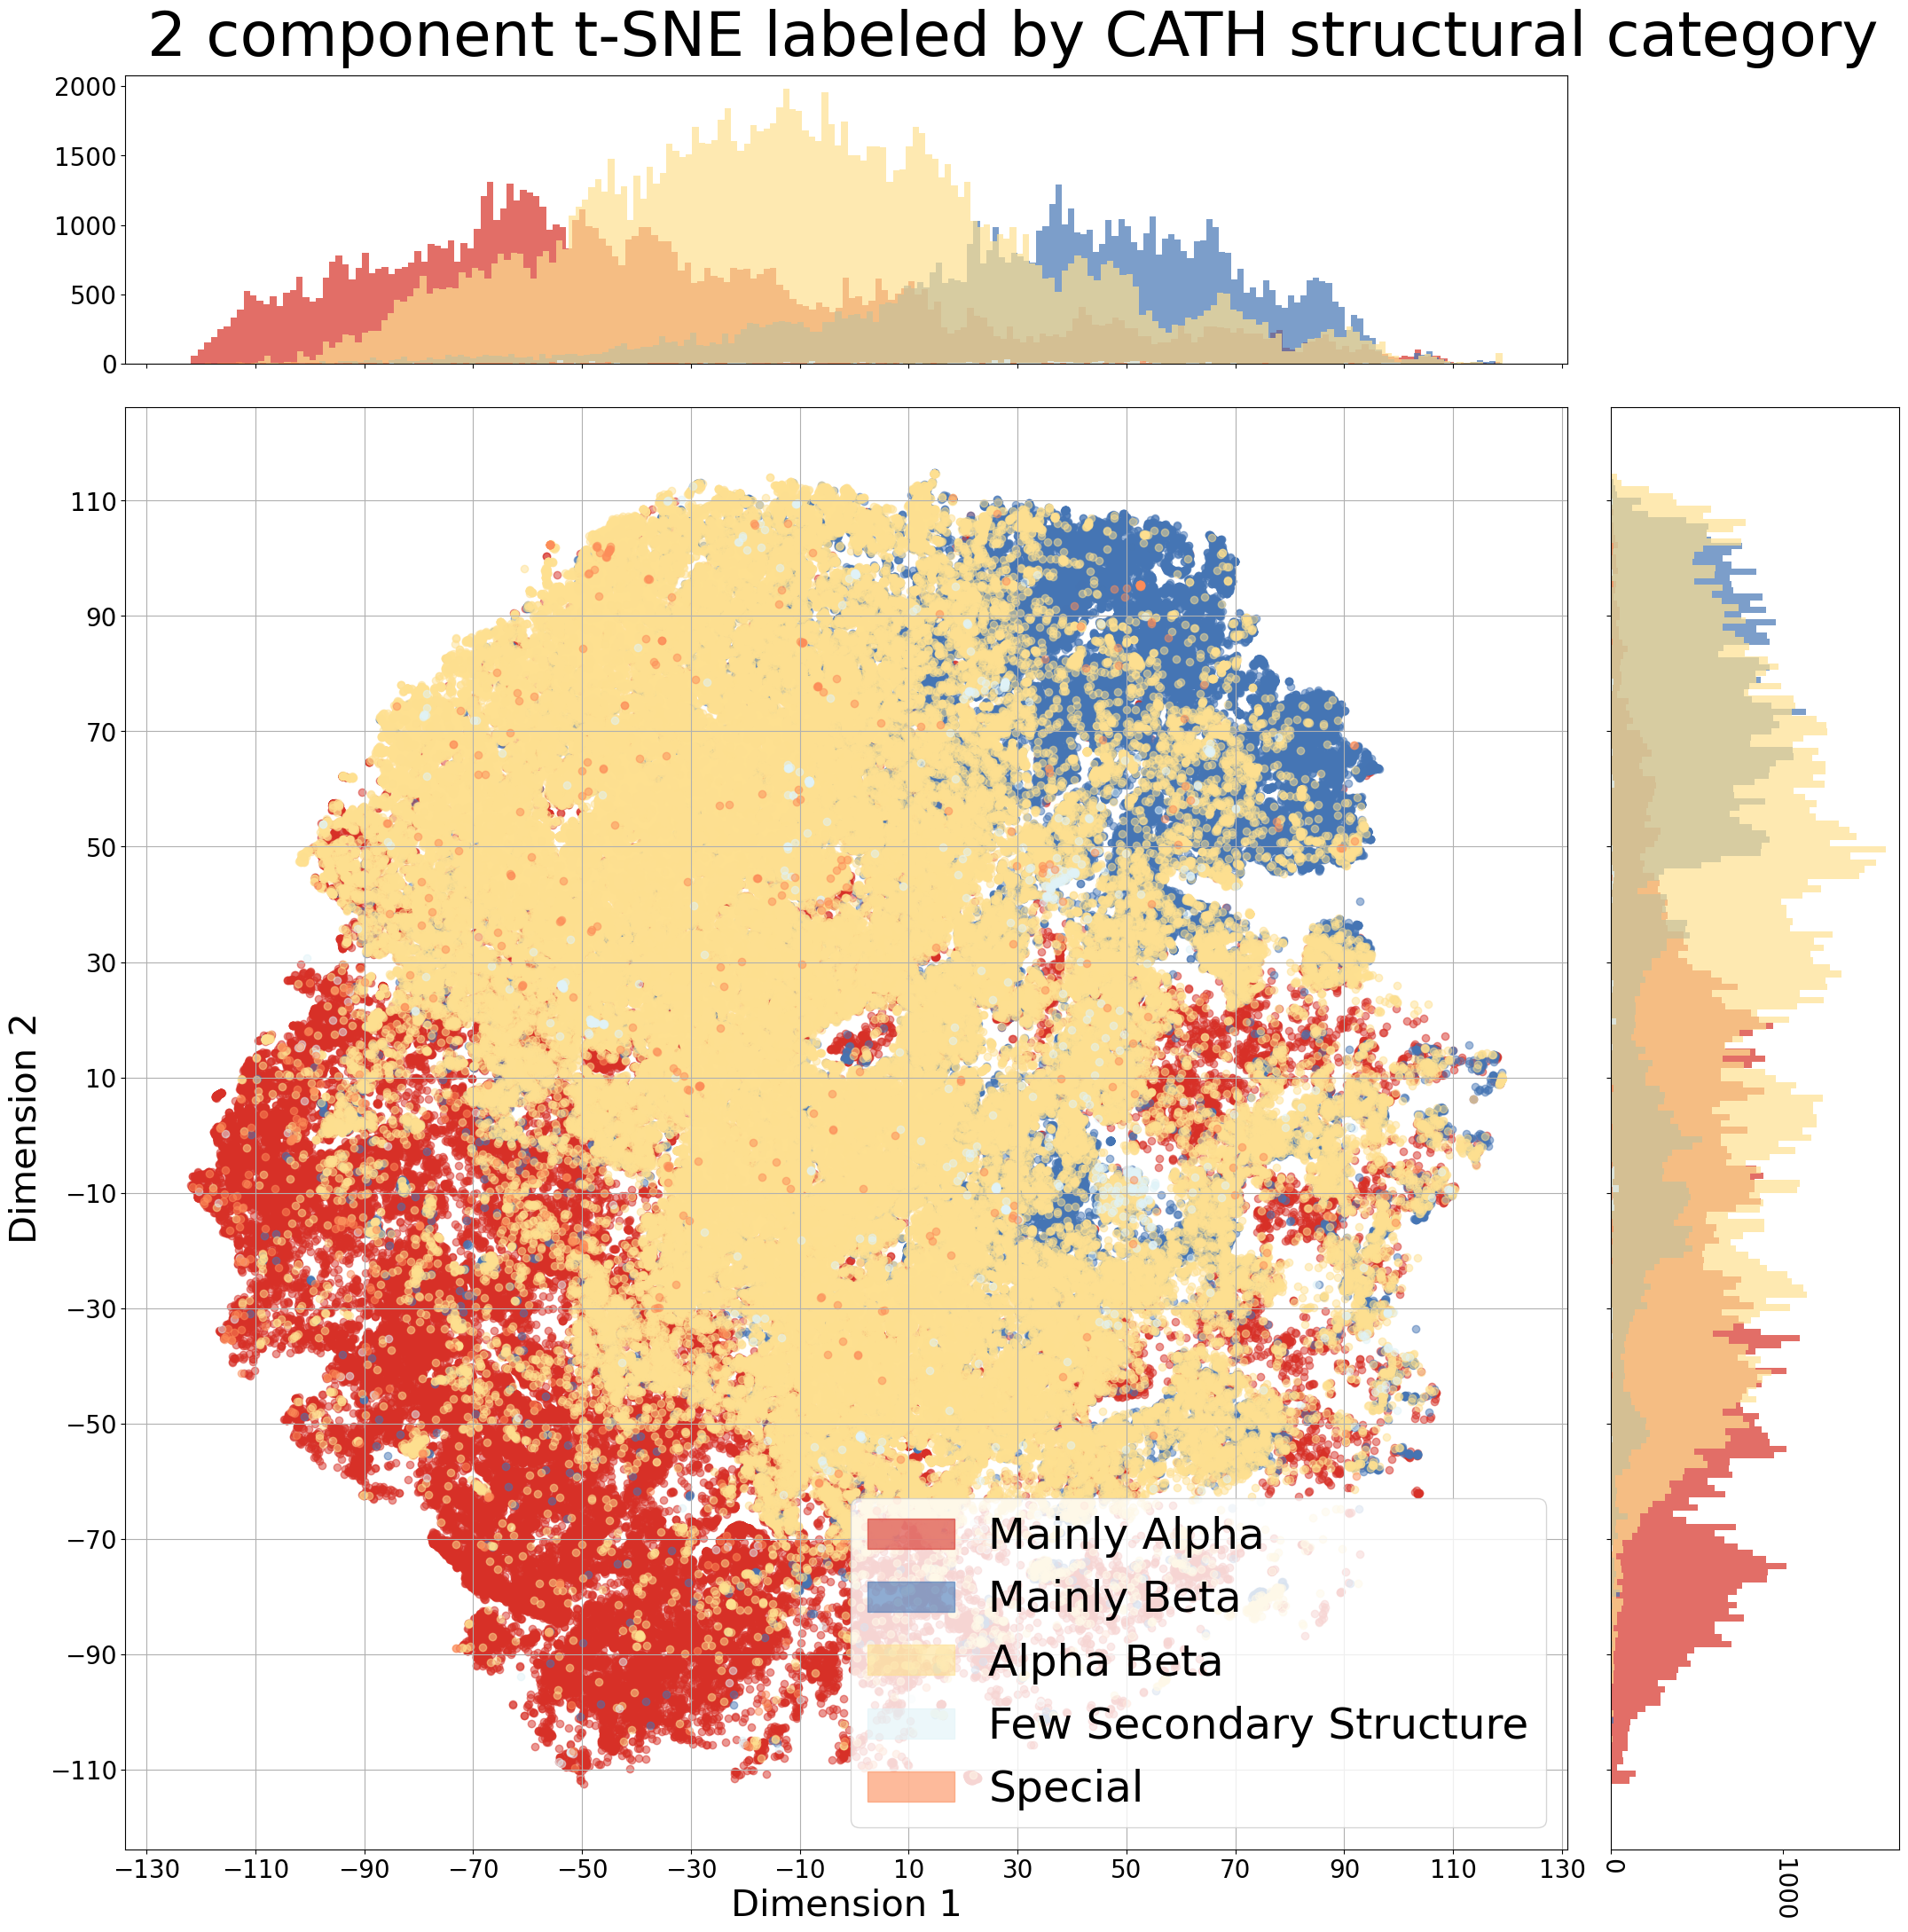

In [37]:
# Assuming you have the finalDf DataFrame with the 'label_4' column
fig = plt.figure(figsize=(25,25))

# Add a gridspec with two rows and two columns and a ratio of 1 to 4 between
# the size of the marginal axes and the main axes in both directions.
# Also adjust the subplot parameters for a square plot.
gs = fig.add_gridspec(2, 2,  width_ratios=(5, 1), height_ratios=(1, 5),
                      left=0.1, right=0.9, bottom=0.1, top=0.9,
                      wspace=0.05, hspace=0.05)

# Create the Axes.
ax = fig.add_subplot(gs[1, 0])
xticks = np.arange(-150, 150, 20) 
yticks = np.arange(-150, 150, 20)  
ax.set_xticks(xticks)
ax.set_yticks(yticks)

# Set tick label size for the scatter plot
ax.tick_params(axis='both', which='major', labelsize=20)

ax_histx = fig.add_subplot(gs[0, 0], sharex=ax)
ax_histy = fig.add_subplot(gs[1, 1], sharey=ax)


ax.set_xlabel('Dimension 1', fontsize = 30)
ax.set_ylabel('Dimension 2', fontsize = 30)
fig.suptitle('2 component t-SNE labeled by CATH structural category', fontsize = 50, y=0.93)

targets = ['1','2','3','4','6']
colors = ['#d73027', '#4575b4',  '#fee090', '#e0f3f8', '#fc8d59']

data_by_target = {target: finalDf[finalDf['label_4'] == target] for target in targets}

for target, color in zip(targets, colors):
    x_data = data_by_target[target]['Dimension 1'].values
    y_data = data_by_target[target]['Dimension 2'].values
    scatter_hist(x_data, y_data, ax, ax_histx, ax_histy, color=color)

ax.grid()
# Create custom legend handles
# Custom labels for the legend
custom_labels = ['Mainly Alpha', 'Mainly Beta', 'Alpha Beta', 'Few Secondary Structure', 'Special']

# Create custom legend handles
legend_handles = [Patch(facecolor=color, edgecolor=color, label=label, linewidth=1, alpha=0.6) for label, color in zip(custom_labels, colors)]

ax.legend(handles=legend_handles, prop={'size': 35})
plt.savefig('./figures/dimension_reduction/t-SNE_CATH_labeling.png',dpi=300)
# Add the custom legend to the plot

plt.show()

In [8]:
wholedata_label_modified.columns.to_list

<bound method IndexOpsMixin.tolist of Index(['design_name', 'file_name', 'full_sequence', 'dssp_assignment',
       'ss_prop_hbonded_turn', 'ss_prop_bend', 'ss_prop_loop',
       'hydrophobic_fitness', 'isoelectric_point', 'charge', 'mass',
       'num_residues', 'packing_density', 'evoef2_total', 'evoef2_ref_total',
       'evoef2_intraR_total', 'evoef2_interS_total', 'rosetta_total',
       'rosetta_fa_atr', 'rosetta_fa_rep', 'rosetta_fa_intra_rep',
       'rosetta_fa_elec', 'rosetta_fa_sol', 'rosetta_lk_ball_wtd',
       'rosetta_fa_intra_sol_xover4', 'rosetta_hbond_lr_bb',
       'rosetta_hbond_sr_bb', 'rosetta_hbond_bb_sc', 'rosetta_hbond_sc',
       'rosetta_dslf_fa13', 'rosetta_rama_prepro', 'rosetta_p_aa_pp',
       'rosetta_fa_dun', 'rosetta_omega', 'rosetta_pro_close',
       'aggrescan3d_total_value', 'aggrescan3d_avg_value',
       'aggrescan3d_min_value', 'aggrescan3d_max_value',
       'composition_hydrophobic', 'composition_polar', 'composition_acidic',
       'compositi

In [7]:

bins = [float('-inf'), 6.5, 7.4, float('inf')]
labels = ['pI<7', 'p~7', 'pI>7']

wholedata_label_modified = wholedata_label.copy()

# Categorize the data
wholedata_label_modified['category'] = pd.cut(wholedata_label['isoelectric_point'], bins=bins, labels=labels)
wholedata_label_modified [].head()

design_name                file_name   
0     pdb6fcp  /input_path/pdb6fcp.ent  \
1     pdb1vbi  /input_path/pdb1vbi.ent   
2     pdb5muf  /input_path/pdb5muf.ent   
3     pdb1h1i  /input_path/pdb1h1i.ent   
4     pdb6daa  /input_path/pdb6daa.ent   

                                       full_sequence   
0  GAMGSMERASLIQKAKLAEQAERYEDMAAFMKGAVEKGEELSCEER...  \
1  MRWRADFLSAWAEALLRKAGADEPSAKAVAWALVEADLRGVGSHGL...   
2  GVWDPNWDRREHYKAKATRHIFLIRHSQYHVDGSLEKDRTLTPLGR...   
3  SSLIVEDAPDHVRPYVIRHYSHARAVTVDTQLYRFYVTGPSSGYAF...   
4  THSHGLFKKLGIPGPTPLPFLGNILSYHKGFCMFDMECHKKYGKVW...   

                                     dssp_assignment  ss_prop_hbonded_turn   
0  -TTTTS-HHHHHHHHHHHHHTT-HHHHHHHHHHHHTT-----HHHH...              0.054393  \
1  -EE-HHHHHHHHHHHHHHTT--HHHHHHHHHHHHHHHHTT-GGGSG...              0.111765   
2  ----TTSS----------EEEEEEE---B-TT-SSGGG--B-HHHH...              0.095390   
3  --SB-SS--SS---EEE-TT--TT-EEETTEEEEEEE-HHHHTTS-...              0.117733   
4  --GGGHHHHHT------BTTTBTGGGGTT-HHHHHHHHHHHH-SEE...              0.117517   

   ss_prop_bend  ss_prop_loop  hydrophobic_fitness  isoelectric_point   
0      0.029289      0.133891            -0.077881                5.0  \
1      0.061765      0.200000            -0.048777                6.9   
2      0.092210      0.284579            -0.039915                8.8   
3      0.151890      0.271076            -0.014972                4.4   
4      0.066519      0.195122            -0.040093                8.9   

      charge  ...  composition_basic  composition_cysteine   
0  -8.291850  ...           0.146444              0.008368  \
1  -0.816415  ...           0.144118              0.000000   
2   9.153017  ...           0.184420              0.014308   
3 -71.321047  ...           0.066860              0.005814   
4   7.318790  ...           0.139690              0.015521   

   composition_glycine  composition_proline  Entry  label_1  label_2   
0             0.054393             0.020921   6FCP      PDB      NaN  \
1             0.117647             0.076471   1VBI      PDB   Pisces   
2             0.062003             0.062003   5MUF      PDB      NaN   
3             0.087209             0.061047   1H1I      PDB      NaN   
4             0.050998             0.075388   6DAA      PDB      NaN   

        label_3  label_4  category  
0   1.20.190.20        1      pI<7  
1  1.10.1530.10        1       p~7  
2  3.40.50.1240        3      pI>7  
3   2.60.120.10        2      pI<7  
4   1.10.630.10        1      pI>7  

[5 rows x 52 columns]

In [10]:
import pandas as pd

# 假设您已经创建了名为 wholedata_label_modified 的 DataFrame
# 计算每种label_4值下的isoelectric_point平均值
mean_isoelectric_points = wholedata_label_modified.groupby('label_4')['isoelectric_point'].std()

# 显示结果
print(mean_isoelectric_points)



label_4
1    1.726636
2    1.714256
3    1.660947
4    1.912871
6    1.909698
Name: isoelectric_point, dtype: float64


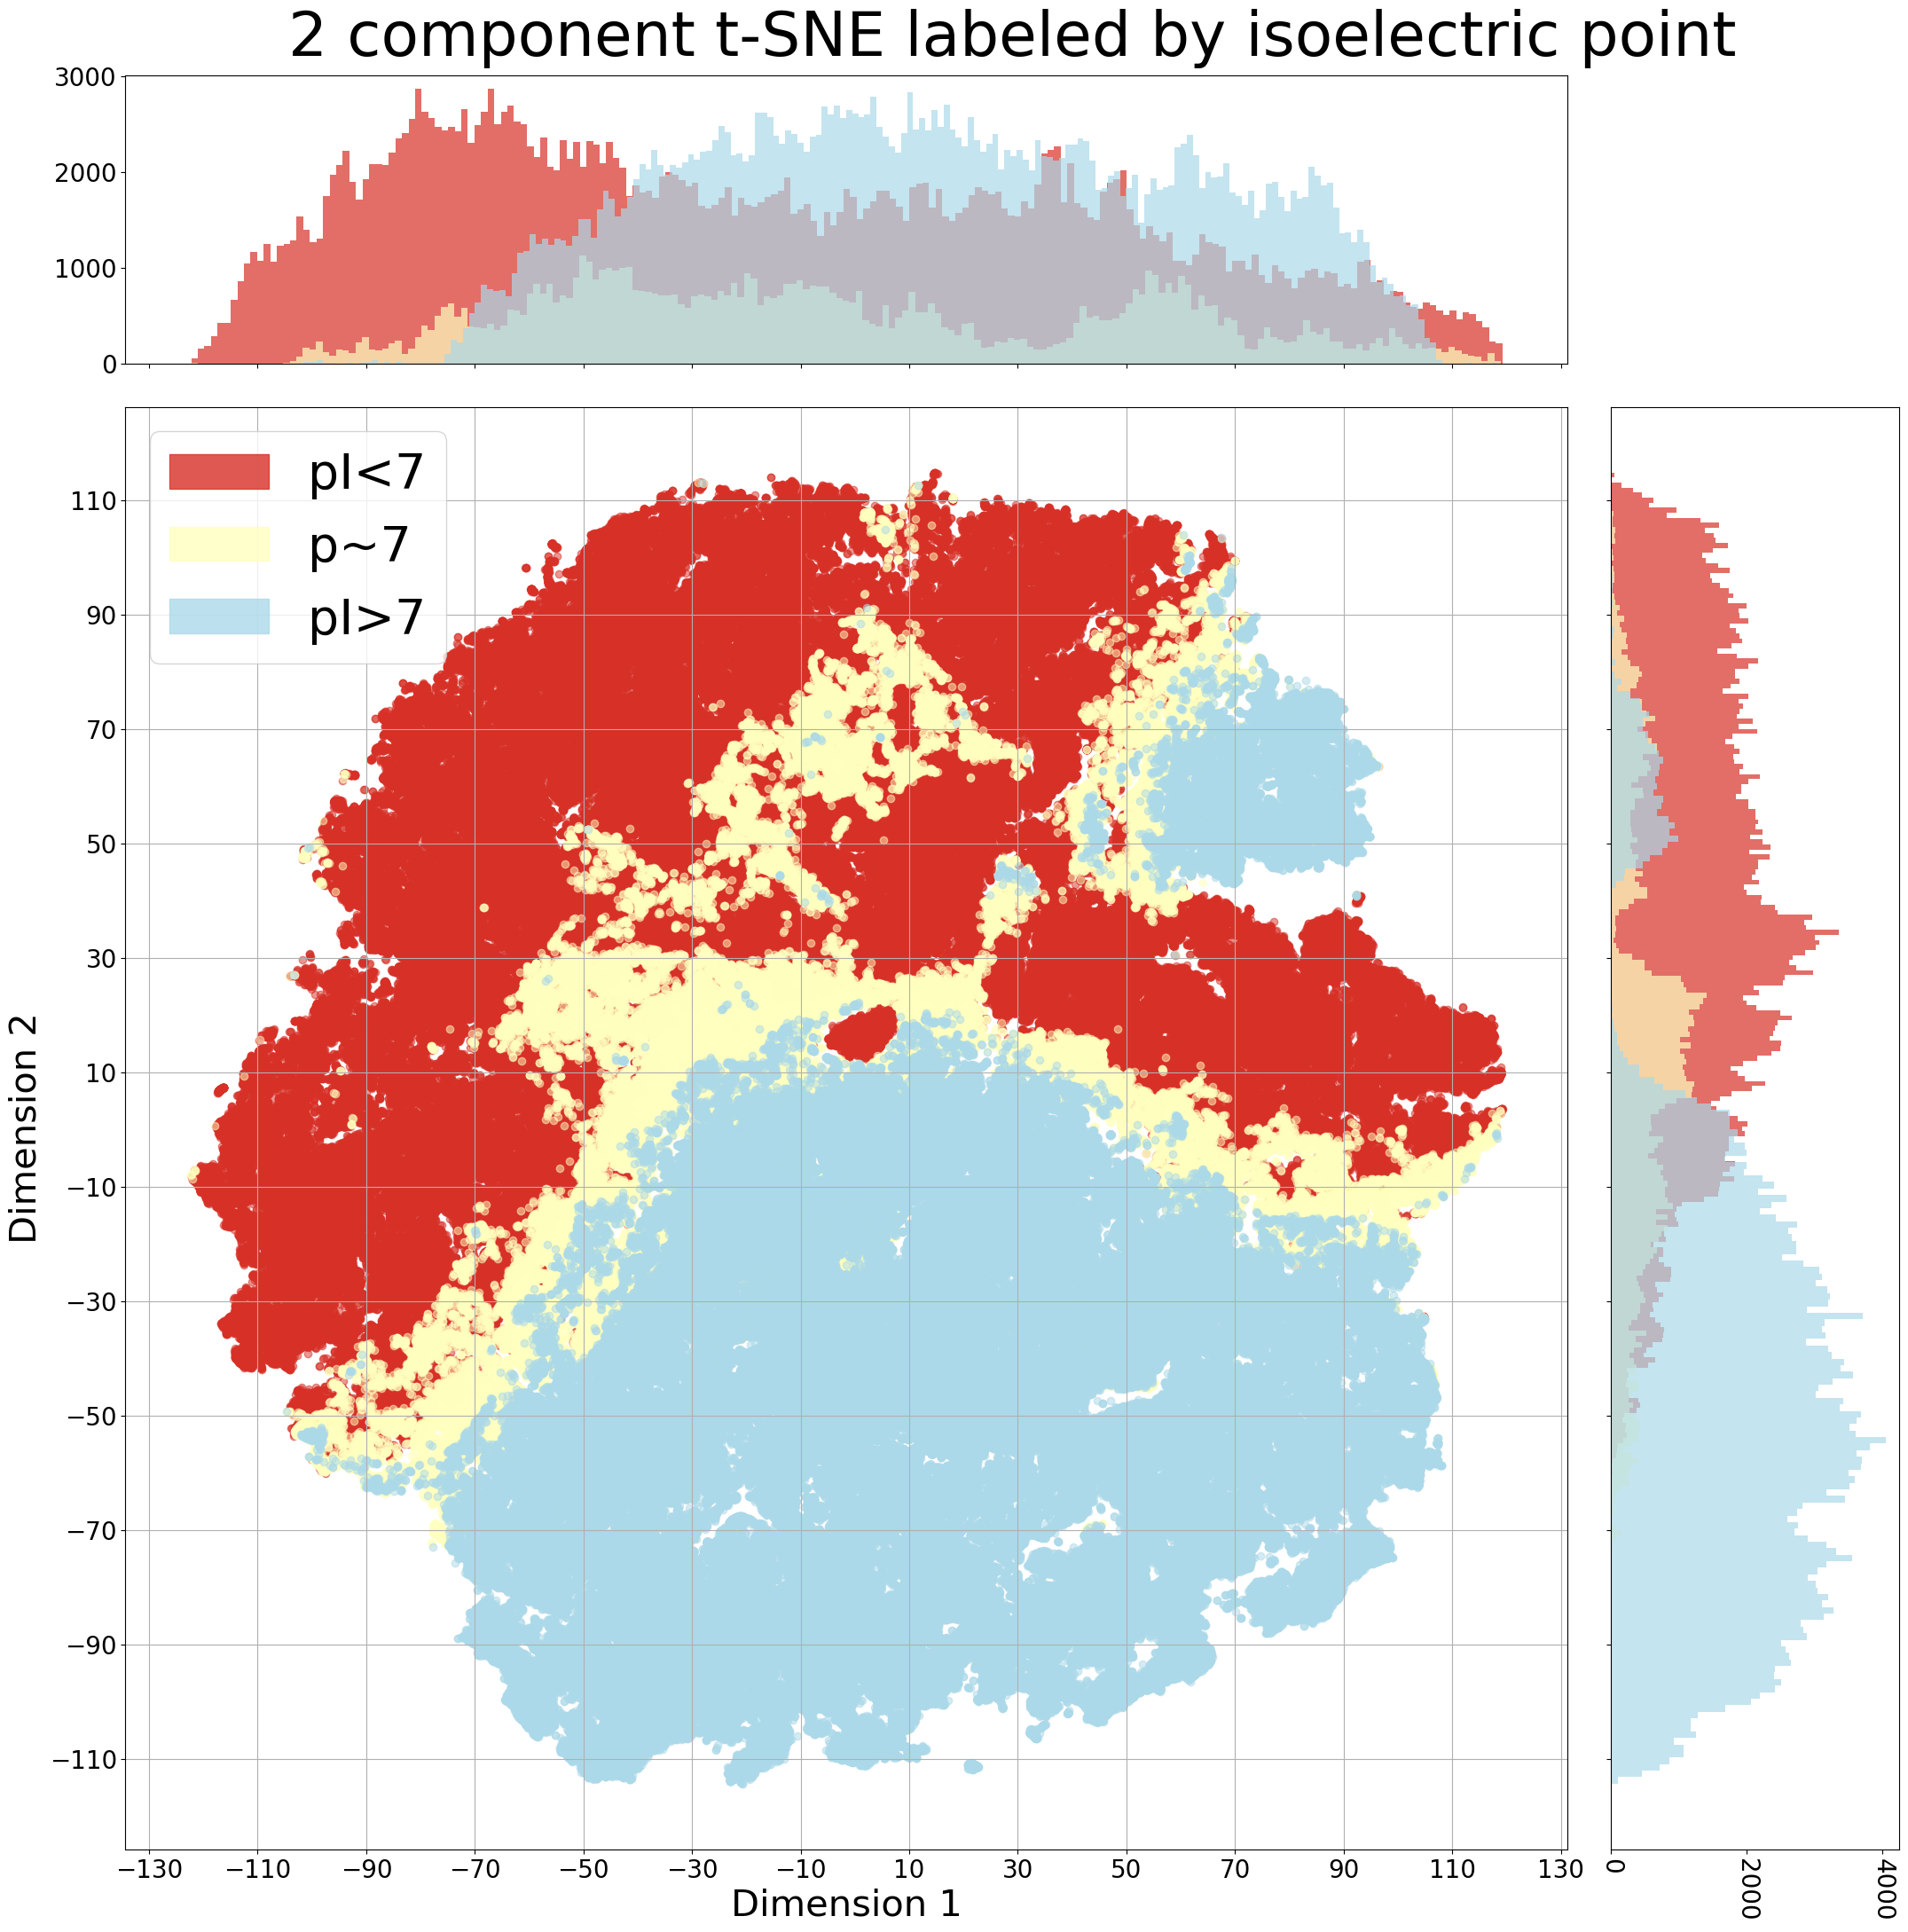

In [38]:
# Define the bins and labels
bins = [float('-inf'), 6.5, 7.4, float('inf')]
labels = ['pI<7', 'p~7', 'pI>7']

wholedata_label_modified = wholedata_label.copy()

# Categorize the data
wholedata_label_modified['category'] = pd.cut(wholedata_label['isoelectric_point'], bins=bins, labels=labels)

# Concatenate the data and label into one DataFrame
z_1 = wholedata_label_modified.loc[:, ['category']]
z_1.reset_index(drop=True, inplace=True)
finalDf = pd.concat([reduced_data_df_num, z_1], axis=1)

# Use your new data
data_lt7 = finalDf[finalDf['category'] == 'pI<7']
data_p7 = finalDf[finalDf['category'] == 'p~7']
data_gt7 = finalDf[finalDf['category'] == 'pI>7']

x_lt7 = data_lt7['Dimension 1'].values
y_lt7 = data_lt7['Dimension 2'].values
x_p7 = data_p7['Dimension 1'].values
y_p7 = data_p7['Dimension 2'].values
x_gt7 = data_gt7['Dimension 1'].values
y_gt7 = data_gt7['Dimension 2'].values

# Start with a square Figure.
fig = plt.figure(figsize=(25, 25))

# Add a gridspec with two rows and two columns and a ratio of 1 to 4 between
# the size of the marginal axes and the main axes in both directions.
# Also adjust the subplot parameters for a square plot.
gs = fig.add_gridspec(2, 2,  width_ratios=(5, 1), height_ratios=(1, 5),
                      left=0.1, right=0.9, bottom=0.1, top=0.9,
                      wspace=0.05, hspace=0.05)

# Create the Axes.
ax = fig.add_subplot(gs[1, 0])
ax_histx = fig.add_subplot(gs[0, 0], sharex=ax)
ax_histy = fig.add_subplot(gs[1, 1], sharey=ax)

xticks = np.arange(-150, 150, 20)
yticks = np.arange(-150, 150,20)
ax.set_xticks(xticks)
ax.set_yticks(yticks)

# Set tick label size for the scatter plot
ax.tick_params(axis='both', which='major', labelsize=20)

# Draw the scatter plot and marginals if data is not empty.
if not data_lt7.empty:
    scatter_hist(x_lt7, y_lt7, ax, ax_histx, ax_histy, color='#D73027')
if not data_p7.empty:
    scatter_hist(x_p7, y_p7, ax, ax_histx, ax_histy, color='#FFFFBF')
if not data_gt7.empty:
    scatter_hist(x_gt7, y_gt7, ax, ax_histx, ax_histy, color='#ABD9E9')

# Set axis labels
ax.set_xlabel('Dimension 1', fontsize=30)
ax.set_ylabel('Dimension 2', fontsize=30)
fig.suptitle('2 component t-SNE labeled by isoelectric point', fontsize=50, y=0.93)
targets = ['pI<7','p~7','pI>7']

colors = ['#D73027', '#FFFFBF', '#ABD9E9']

# Create legend
legend_handles = [Patch(facecolor=color, edgecolor=color, label=str(target),
                        linewidth=1, alpha=0.8) for target, color in zip(targets, colors)]
ax.grid()
ax.legend(handles=legend_handles, prop={'size': 40})
plt.savefig('./figures/dimension_reduction/t-SNE_isoelectric_point.png', dpi=300)
# Display the plot
plt.show()


label by loop


/var/folders/jq/ph87kw_d695bbwx2yc22bgxh0000gn/T/ipykernel_13261/2184630149.py:67: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig('./figures/dimension_reduction/tSNE_loop_composition.png',dpi=300)
/Users/Zachary/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


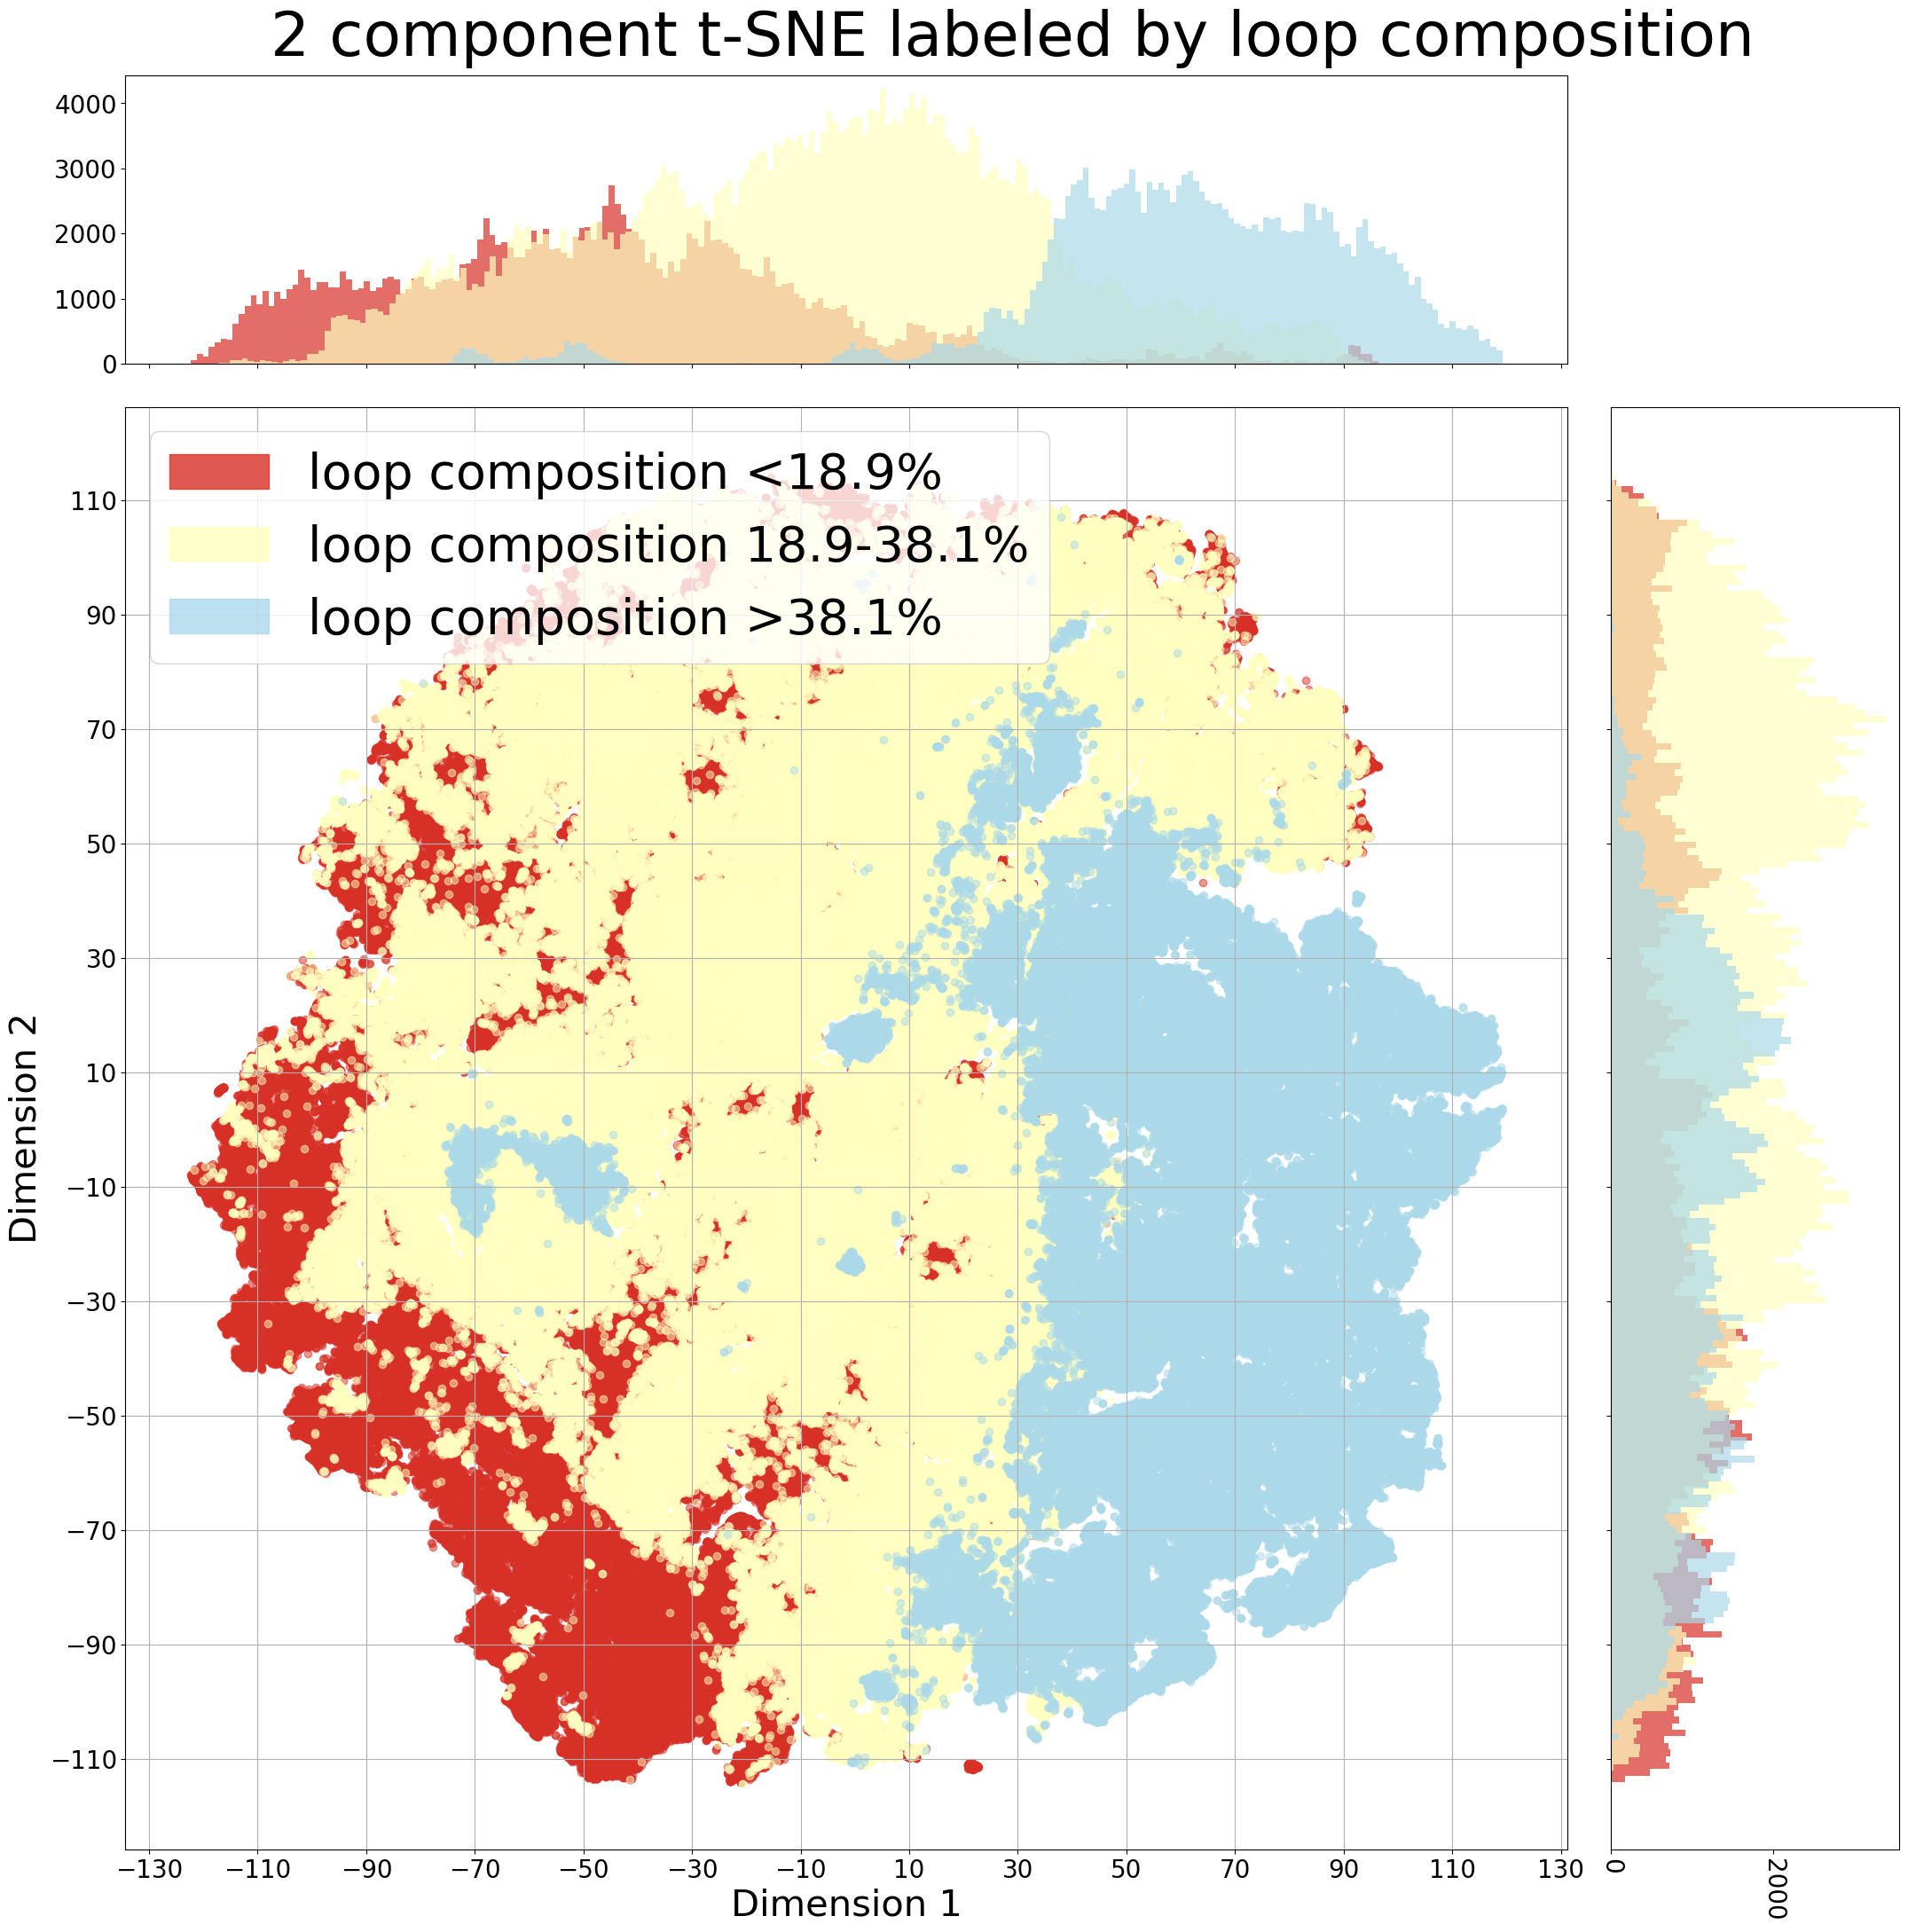

In [39]:
# Define the bins and labels
bins = [float('-inf'), 0.189, 0.381, float('inf')]
labels = ['loop composition <18.9%', 'loop composition 18.9-38.1%', 'loop composition >38.1%']

wholedata_label_modified = wholedata_label.copy()

# Categorize the data
wholedata_label_modified['category'] = pd.cut(wholedata_label['ss_prop_loop'], bins=bins, labels=labels)

# Concatenate the data and label into one DataFrame
z_1 = wholedata_label_modified.loc[:, ['category']]
z_1.reset_index(drop=True, inplace=True)
finalDf = pd.concat([reduced_data_df_num, z_1], axis=1)

# Use your new data
data_lt36 = finalDf[finalDf['category'] == 'loop composition <18.9%']
data_36_43 = finalDf[finalDf['category'] == 'loop composition 18.9-38.1%']
data_gt43 = finalDf[finalDf['category'] == 'loop composition >38.1%']

x_lt36 = data_lt36['Dimension 1'].values
y_lt36 = data_lt36['Dimension 2'].values
x_36_43 = data_36_43['Dimension 1'].values
y_36_43 = data_36_43['Dimension 2'].values
x_gt43 = data_gt43['Dimension 1'].values
y_gt43 = data_gt43['Dimension 2'].values

# Start with a square Figure.
fig = plt.figure(figsize=(25, 25))

# Add a gridspec with two rows and two columns and a ratio of 1 to 4 between
# the size of the marginal axes and the main axes in both directions.
# Also adjust the subplot parameters for a square plot.
gs = fig.add_gridspec(2, 2,  width_ratios=(5, 1), height_ratios=(1, 5),
                      left=0.1, right=0.9, bottom=0.1, top=0.9,
                      wspace=0.05, hspace=0.05)

# Create the Axes.
ax = fig.add_subplot(gs[1, 0])
ax_histx = fig.add_subplot(gs[0, 0], sharex=ax)
ax_histy = fig.add_subplot(gs[1, 1], sharey=ax)

xticks = np.arange(-150, 150, 20)
yticks = np.arange(-150, 150, 20)
ax.set_xticks(xticks)
ax.set_yticks(yticks)

# Set tick label size for the scatter plot
ax.tick_params(axis='both', which='major', labelsize=20)
# Draw the scatter plot and marginals.
scatter_hist(x_lt36, y_lt36, ax, ax_histx, ax_histy, color='#D73027')
scatter_hist(x_36_43, y_36_43, ax, ax_histx, ax_histy, color='#FFFFBF')
scatter_hist(x_gt43, y_gt43, ax, ax_histx, ax_histy, color='#ABD9E9')

# Set axis labels
ax.set_xlabel('Dimension 1', fontsize=30)
ax.set_ylabel('Dimension 2', fontsize=30)
fig.suptitle('2 component t-SNE labeled by loop composition', fontsize=50, y=0.93)
targets = ['loop composition <18.9%', 'loop composition 18.9-38.1%', 'loop composition >38.1%']

colors = ['#D73027', '#FFFFBF', '#ABD9E9']

# Create legend
legend_handles = [Patch(facecolor=color, edgecolor=color, label=str(target),
                        linewidth=1, alpha=0.8) for target, color in zip(targets, colors)]
ax.grid()
ax.legend(handles=legend_handles, prop={'size': 40})
plt.savefig('./figures/dimension_reduction/tSNE_loop_composition.png',dpi=300)
# Display the plot
plt.show()

